# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

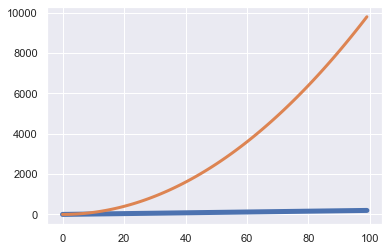

In [3]:
# Method 1
x_y = plt.plot(x, y, label='linear', linewidth = 5)
x_z = plt.plot(x, z, label='linear', linewidth = 3)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

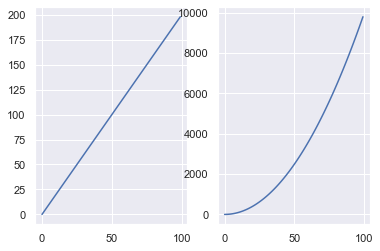

In [4]:
# Method 2

fig, axs = plt.subplots(1, 2)
axs[0].plot(x, y)
axs[1].plot(x, z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

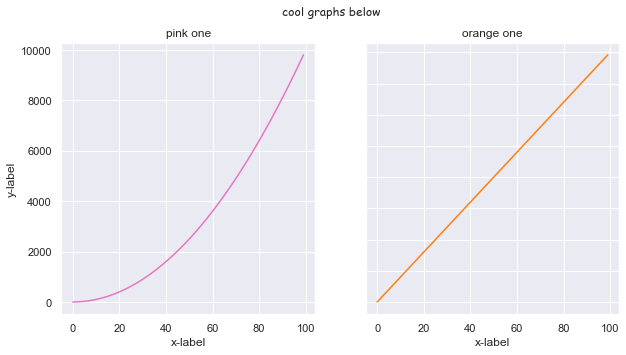

In [5]:
# your code here
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
csfont = {'fontname':'Comic Sans MS'}
afont = {'fontname':'Arial'}
fig.suptitle('cool graphs below',**csfont)
#plt.rcParams['font.size'] = 14

axs[0].plot(x, z,'tab:pink',label= 'pink')
axs[0].set_title('pink one',**afont)

axs[1].plot(x, y,'tab:orange')
axs[1].set_title('orange one',**afont)

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

for ax in axs.flat:
    ax.label_outer()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

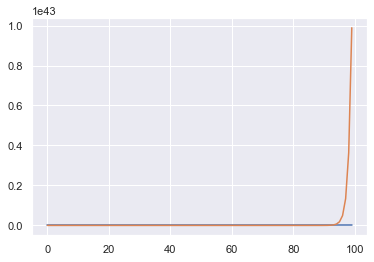

In [6]:
# your code here

y1=x**2
y2=np.exp(x)

plt.plot(y1)
plt.plot(y2)#.set_yscale('log')

#set_xscale('linear')
#set_yscale('log')


#I didn't managed this exercise. what was suppose to be done?

#### As a bonus challenge, try to add a legend to the plot.

Text(0, 0.5, '$\\exp(x)$')

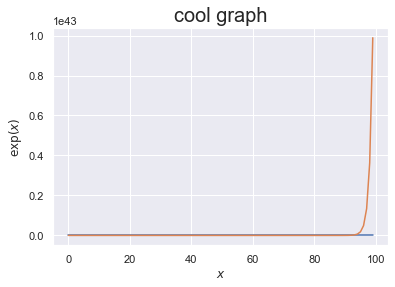

In [7]:
# your code here
y1=x**2
y2=np.exp(x)

plt.plot(y1)
plt.plot(y2)

plt.title ("cool graph", fontsize = 20,fontweight="regular")
plt.xlabel('$x$')
plt.ylabel('$\exp(x)$')

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


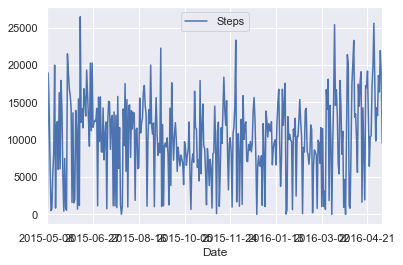

In [8]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.plot(x='Date', y='Steps')
fitbit.head()

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

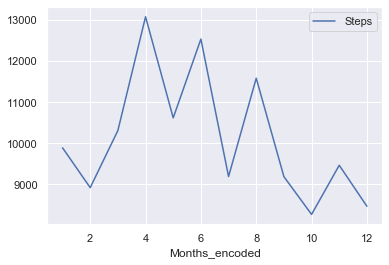

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

fitbit_months1 = fitbit[['Months_encoded','Steps']]
fitbit_months1

fitbit_months = fitbit_months1.groupby(['Months_encoded']).agg({'Steps':'mean'})
fitbit_months

months = sns.lineplot(data=fitbit_months)

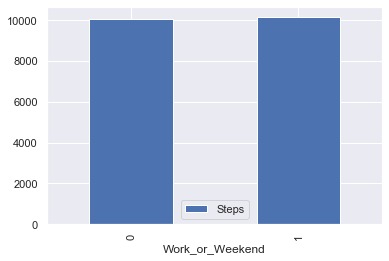

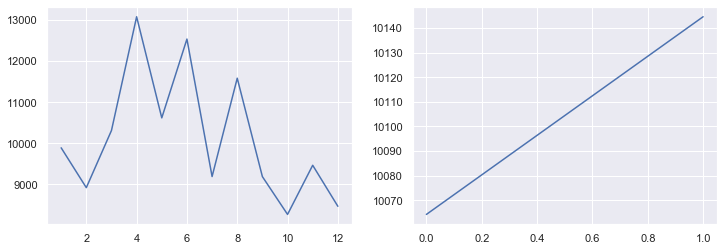

In [10]:
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
fitbit_week1 = fitbit[['Work_or_Weekend','Steps']]
fitbit_week1

#fitbit_week = fitbit_week1.groupby(['Work_or_Weekend']).agg({'Steps':'mean'})

fitbit_week = fitbit_week1[['Work_or_Weekend','Steps']].groupby(['Work_or_Weekend']).agg('mean')
fitbit_week.plot.bar()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(fitbit_months)
axs[1].plot(fitbit_week) #???????
plt.savefig('steps1.png')

#plt.sca ??
#plt.xticks??

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

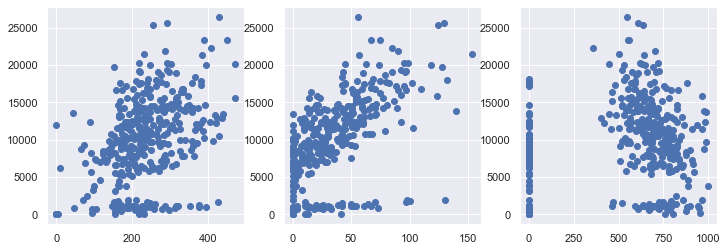

In [11]:
# your code here

#why the loop? how?

minutes = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].scatter(fitbit['Minutes Lightly Active'], fitbit['Steps'])
axs[1].scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
axs[2].scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])

plt.savefig('steps2.png')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [12]:
# your code here
titanic = pd.read_csv('titanic.csv')
#titanic.plot()
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [13]:
# your code here
types = titanic.dtypes
types

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [14]:
# NUMERICAL VARIABLES
# your code here

titanic_numerical = titanic.select_dtypes(exclude ='object')
titanic_numerical.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [15]:
# CATEGORICAL VARIABLES
# your code here
titanic_categorical = titanic.select_dtypes(include ='object')
titanic_categorical.head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [16]:
# your code here

#?

#fig, axs = plt.subplots(1, 3, figsize=(12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

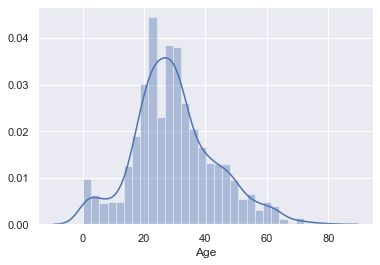

In [17]:
# your code here
sns.distplot(titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

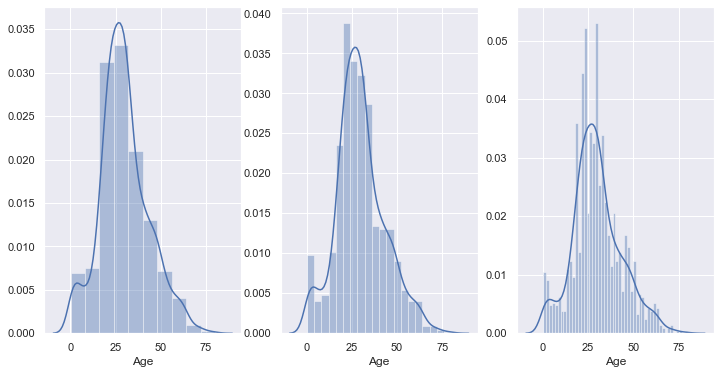

In [18]:
# your code here

fig, axes = plt.subplots(1, 3, figsize=(12, 6))                    

sns.distplot(titanic['Age'],ax=axes[0], bins=10)
sns.distplot(titanic['Age'],ax=axes[1], bins=20)
sns.distplot(titanic['Age'],ax=axes[2], bins=50)

#### How does the bin size affect your plot?

In [19]:
"""
The bigger the bin size the more bins there are.
"""

'\nThe bigger the bin size the more bins there are.\n'

#### Use seaborn to show the distribution of column `Age`.

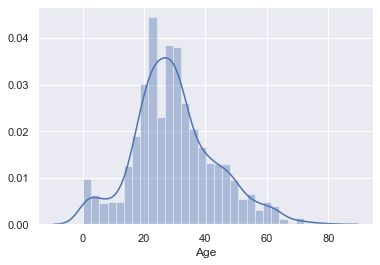

In [20]:
# your code here
sns.distplot(titanic['Age'])

#normal distribution?

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

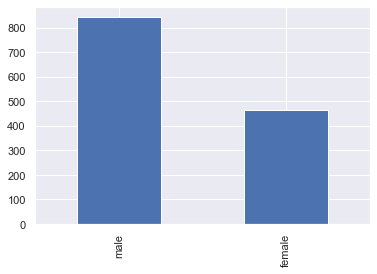

In [21]:
# Method 1 - matplotlib
# your code here

titanic["Gender"].value_counts().plot.bar()


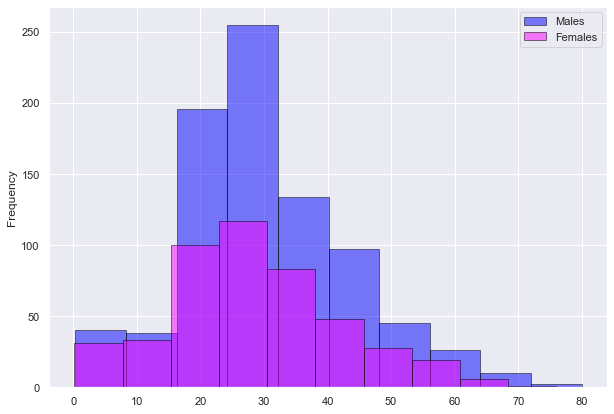

In [22]:
#experiments
titanic[titanic['Gender']=='male'].Age.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
titanic[titanic['Gender']=='female'].Age.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Males','Females'])

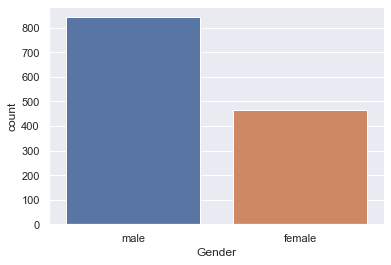

In [23]:
# Method 2 - seaborn
# your code here

sns.countplot(data=titanic, x = 'Gender')

#### Use the right plot to visualize the column `Pclass`.

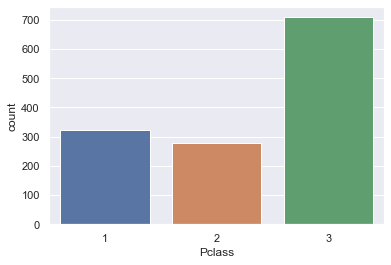

In [24]:
# your code here
sns.countplot(data=titanic, x = 'Pclass')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

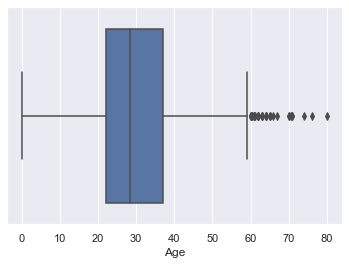

In [25]:
# your code here

sns.boxplot(titanic['Age'])

In [26]:
"""
From datascience+.com: A box plot (or box-and-whisker plot) shows the distribution of quantitative 
data in a way that facilitates comparisons between variables or across levels of a categorical variable.
The box shows the quartiles of the dataset while the whiskers extend to show the rest 
of the distribution,except for points that are determined to be “outliers”
"""

'\nFrom datascience+.com: A box plot (or box-and-whisker plot) shows the distribution of quantitative \ndata in a way that facilitates comparisons between variables or across levels of a categorical variable.\nThe box shows the quartiles of the dataset while the whiskers extend to show the rest \nof the distribution,except for points that are determined to be “outliers”\n'

#### What does the last plot tell you about the feature `Age`?

In [27]:
"""
That the average age is around 29y, where most people have between 21 and 38.
From the whiskers we can tell that the age range extends till 0 and 60y.
Beyond 60y is mainly outliers, so not many people with age above 60y.
"""

'\nThat the average age is around 29y, where most people have between 21 and 38.\nFrom the whiskers we can tell that the age range extends till 0 and 60y.\nBeyond 60y is mainly outliers, so not many people with age above 60y.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

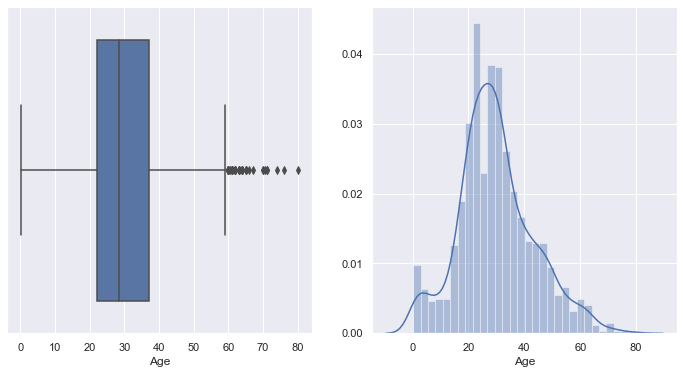

In [28]:
# your code here

#sns.boxplot(titanic['Age'])
#sns.distplot(titanic['Age'])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))                    

sns.boxplot(titanic['Age'],ax=axes[0])
sns.distplot(titanic['Age'],ax=axes[1])

#### What additional information does the last plot provide about feature `Age`?

In [29]:
"""
That the age is normally distrubuted?
We can also infer the same as before, that the average age is around 29y
"""

'\nThat the age is normally distrubuted?\nWe can also infer the same as before, that the average age is around 29y\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

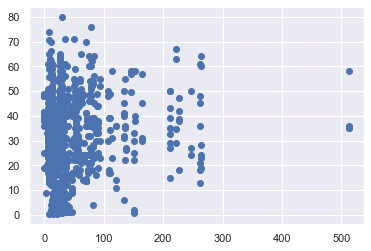

In [30]:
# Method 1 - matplotlib
# your code here

#titanic.plot(kind='scatter', x='Fare',y='Age', color='blue',alpha=0.5, figsize=(10,7))

plt.scatter(titanic['Fare'], titanic['Age'])

#how to make the regression line?
#plt.plot(titanic['Fare'], titanic['Age'], color='red') ??

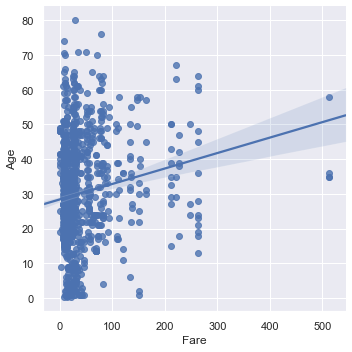

In [31]:
# Method 2 - seaborn
# your code here

sns.lmplot(x="Fare", y="Age", data=titanic)
#is this good?

# control x and y limits. why this doesn't work?
#sns.plt.ylim(0, 20)
#sns.plt.xlim(0, None)

#### Plot the correlation matrix using seaborn.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


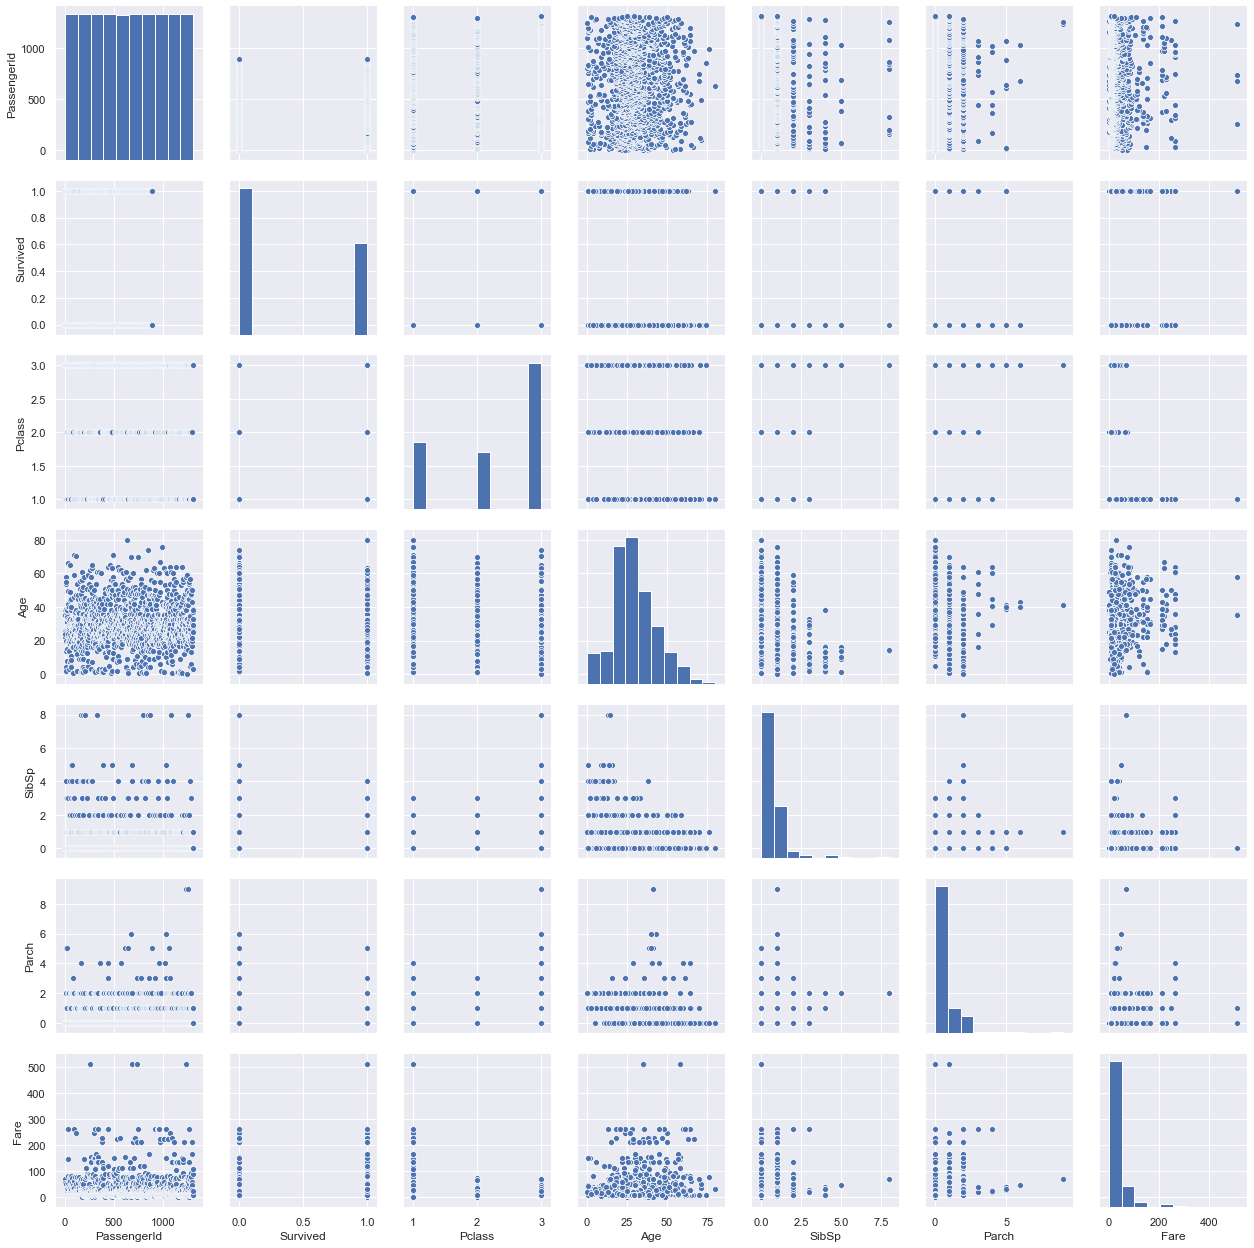

In [32]:
# your code hereA
sns.pairplot(titanic)

#### What are the most correlated features?

In [37]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


In [33]:
"""
Age and PClass; PClass and Fare
"""

'\n??\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

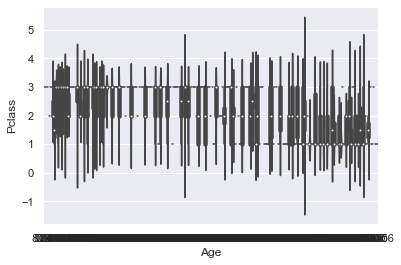

In [34]:
# your code here
#sns.violinplot(x="Age", y="Pclass", data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [35]:
# your code here